## Apply following feature detection techniques:

i) Hough Transform <br>
ii) Harris and Hessian <br>
iii) SIFT<br>
iv) SURF<br>
v) HOG<br>


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./Assets/Img.jpg')

In [4]:
def show(transformedImage):
    plt.imshow(transformedImage)
    plt.show()

# Hough Transform

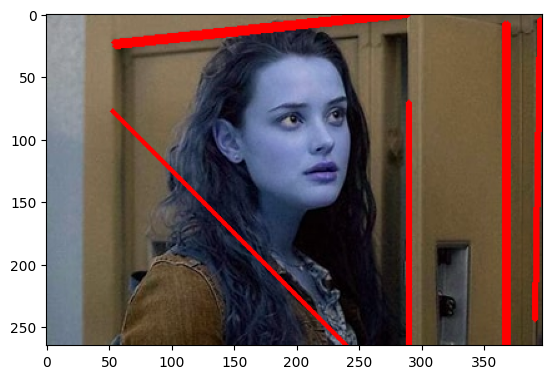

In [5]:
# Edge Detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255,0,0), 3)

show(img)

# Harris and Hessian
### Corner detection

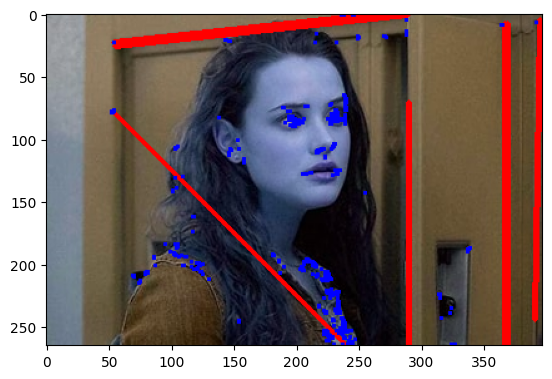

In [6]:
operatedImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
operatedImage =np.float32(operatedImage)

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)

img[dest > 0.01 * dest.max()] = [0, 0, 255]
show(img)

# SIFT

In [10]:
img = cv2.imread('./Assets/Img.jpg')
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

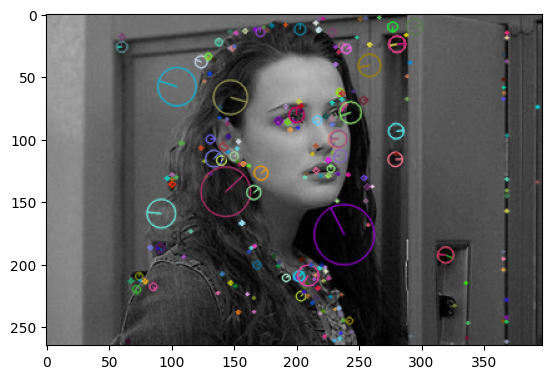

In [12]:
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show(img)

# SURF

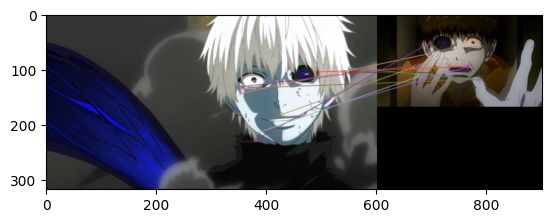

In [13]:
img1 = cv2.imread("./Assets/img1.jpg")
img2 = cv2.imread("./Assets/img2.jpg")

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(img3) 
plt.show()

# HOG

In [14]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

(265, 397, 3)


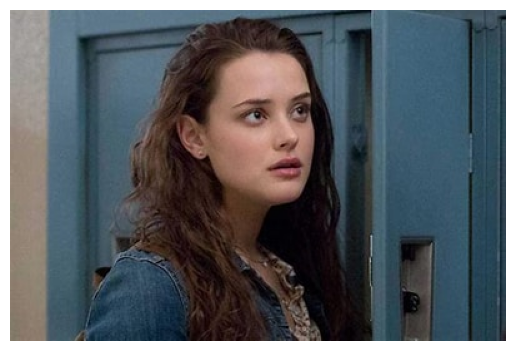

In [15]:
# reading the image
img = imread('./Assets/Img.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256, 3)


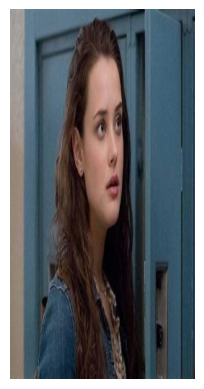

In [16]:
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

C:\Users\HP\AppData\Local\Temp\ipykernel_5880\1920647108.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


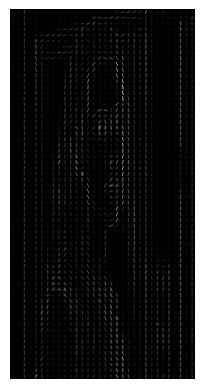

In [17]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

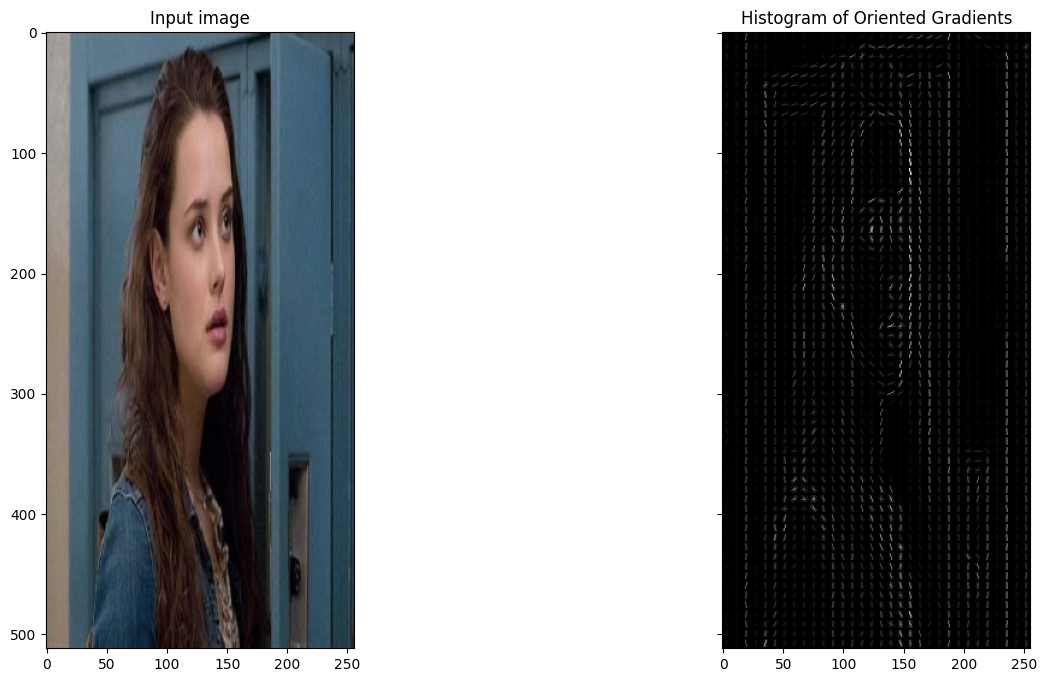

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey= True)
ax1.imshow(resized_img, cmap= plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()